<a href="https://colab.research.google.com/github/adityachoudharyclg/internshipProjectClg/blob/master/lfr_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F

import networkx as nx
from sklearn.cluster import KMeans
from sklearn import metrics
import re

In [ ]:
!wget https://github.com/adityachoudharyclg/internshipProjectClg/archive/master.zip

--2020-07-09 11:18:10--  https://github.com/adityachoudharyclg/internshipProjectClg/archive/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/adityachoudharyclg/internshipProjectClg/zip/master [following]
--2020-07-09 11:18:11--  https://codeload.github.com/adityachoudharyclg/internshipProjectClg/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [ <=>                ] 226.95K  --.-KB/s    in 0.04s   

2020-07-09 11:18:11 (5.64 MB/s) - ‘master.zip’ saved [232401]



In [ ]:
!unzip master.zip

Archive:  master.zip
1162fe61951dca48e3f549a5f098b3e926bad09d
   creating: internshipProjectClg-master/
  inflating: internshipProjectClg-master/.gitattributes  
   creating: internshipProjectClg-master/AdjNoun/
  inflating: internshipProjectClg-master/AdjNoun/adjnoun.gml  
  inflating: internshipProjectClg-master/AdjNoun/adjnoun.txt  
  inflating: internshipProjectClg-master/AdjNoun/adjnoun.zip  
   creating: internshipProjectClg-master/Dolphins/
  inflating: internshipProjectClg-master/Dolphins/dolphins.gml  
  inflating: internshipProjectClg-master/Dolphins/dolphins.txt  
  inflating: internshipProjectClg-master/Dolphins/dolphins.zip  
   creating: internshipProjectClg-master/Football/
  inflating: internshipProjectClg-master/Football/football.gml  
  inflating: internshipProjectClg-master/Football/football.txt  
  inflating: internshipProjectClg-master/Football/football.zip  
   creating: internshipProjectClg-master/Karate/
  inflating: internshipProjectClg-master/Karate/karate.gml

In [ ]:
data=[(1, 10), (1, 22), (1, 33), (1, 42), (1, 48), (1, 49), (1, 52), (1, 60), (1, 66), (1, 71), (1, 73), (1, 81), (1, 104), (1, 111), (1, 118), (1, 125), (2, 20), (2, 25), (2, 26), (2, 27), (2, 50), (2, 54), (2, 57), (2, 59), (2, 75), (2, 79), (2, 83), (2, 88), (2, 92), (2, 94), (2, 110), (2, 128), (3, 14), (3, 16), (3, 17), (3, 24), (3, 29), (3, 37), (3, 46), (3, 50), (3, 62), (3, 96), (3, 97), (3, 100), (3, 101), (3, 108), (3, 112), (3, 117), (4, 8), (4, 11), (4, 20), (4, 25), (4, 26), (4, 27), (4, 32), (4, 38), (4, 63), (4, 75), (4, 76), (4, 88), (4, 97), (4, 109), (4, 115), (4, 127), (5, 6), (5, 10), (5, 28), (5, 39), (5, 44), (5, 45), (5, 48), (5, 49), (5, 55), (5, 60), (5, 67), (5, 81), (5, 87), (5, 90), (5, 97), (5, 111), (6, 21), (6, 28), (6, 43), (6, 45), (6, 48), (6, 65), (6, 66), (6, 67), (6, 81), (6, 104), (6, 111), (6, 117), (6, 118), (6, 121), (6, 125), (7, 12), (7, 17), (7, 23), (7, 35), (7, 37), (7, 39), (7, 46), (7, 50), (7, 51), (7, 53), (7, 85), (7, 97), (7, 99), (7, 100), (7, 101), (7, 114), (8, 25), (8, 27), (8, 35), (8, 38), (8, 54), (8, 57), (8, 59), (8, 61), (8, 63), (8, 76), (8, 79), (8, 86), (8, 88), (8, 119), (8, 128), (9, 15), (9, 24), (9, 47), (9, 58), (9, 64), (9, 69), (9, 72), (9, 74), (9, 81), (9, 87), (9, 91), (9, 95), (9, 105), (9, 116), (9, 121), (9, 123), (10, 22), (10, 28), (10, 30), (10, 45), (10, 49), (10, 50), (10, 66), (10, 67), (10, 81), (10, 117), (10, 118), (10, 119), (10, 125), (10, 126), (11, 26), (11, 27), (11, 30), (11, 38), (11, 49), (11, 54), (11, 59), (11, 61), (11, 63), (11, 79), (11, 83), (11, 89), (11, 92), (11, 109), (11, 127), (12, 13), (12, 16), (12, 17), (12, 18), (12, 23), (12, 35), (12, 46), (12, 53), (12, 68), (12, 80), (12, 101), (12, 103), (12, 106), (12, 108), (12, 122), (13, 14), (13, 18), (13, 29), (13, 35), (13, 37), (13, 42), (13, 46), (13, 62), (13, 68), (13, 79), (13, 80), (13, 85), (13, 96), (13, 100), (13, 122), (14, 18), (14, 23), (14, 29), (14, 37), (14, 48), (14, 50), (14, 53), (14, 69), (14, 80), (14, 84), (14, 96), (14, 99), (14, 108), (14, 122), (15, 18), (15, 24), (15, 31), (15, 34), (15, 36), (15, 65), (15, 69), (15, 72), (15, 82), (15, 87), (15, 95), (15, 102), (15, 106), (15, 120), (15, 123), (16, 18), (16, 37), (16, 46), (16, 50), (16, 51), (16, 53), (16, 57), (16, 68), (16, 73), (16, 80), (16, 84), (16, 85), (16, 96), (16, 112), (17, 28), (17, 29), (17, 46), (17, 62), (17, 73), (17, 80), (17, 84), (17, 96), (17, 97), (17, 99), (17, 101), (17, 112), (17, 114), (18, 35), (18, 53), (18, 65), (18, 68), (18, 73), (18, 80), (18, 84), (18, 99), (18, 106), (18, 108), (18, 122), (19, 27), (19, 38), (19, 57), (19, 59), (19, 76), (19, 83), (19, 86), (19, 89), (19, 92), (19, 94), (19, 98), (19, 110), (19, 113), (19, 115), (19, 126), (19, 127), (20, 26), (20, 27), (20, 38), (20, 57), (20, 62), (20, 75), (20, 78), (20, 83), (20, 89), (20, 94), (20, 98), (20, 105), (20, 115), (20, 127), (21, 24), (21, 34), (21, 36), (21, 56), (21, 64), (21, 91), (21, 93), (21, 95), (21, 102), (21, 103), (21, 105), (21, 120), (21, 123), (21, 124), (21, 125), (22, 30), (22, 40), (22, 42), (22, 43), (22, 45), (22, 52), (22, 55), (22, 60), (22, 71), (22, 98), (22, 104), (22, 111), (22, 117), (22, 121), (23, 29), (23, 35), (23, 37), (23, 46), (23, 49), (23, 51), (23, 73), (23, 85), (23, 99), (23, 106), (23, 112), (23, 114), (23, 122), (24, 33), (24, 40), (24, 56), (24, 72), (24, 77), (24, 82), (24, 91), (24, 102), (24, 105), (24, 108), (24, 113), (24, 116), (25, 26), (25, 27), (25, 32), (25, 38), (25, 61), (25, 63), (25, 67), (25, 76), (25, 86), (25, 89), (25, 92), (25, 110), (25, 127), (26, 32), (26, 38), (26, 59), (26, 61), (26, 63), (26, 75), (26, 78), (26, 83), (26, 86), (26, 94), (26, 122), (27, 41), (27, 56), (27, 57), (27, 59), (27, 83), (27, 92), (27, 98), (27, 110), (27, 115), (28, 30), (28, 48), (28, 52), (28, 60), (28, 70), (28, 90), (28, 100), (28, 104), (28, 118), (28, 119), (28, 121), (28, 125), (29, 35), (29, 50), (29, 51), (29, 93), (29, 96), (29, 97), (29, 99), (29, 100), (29, 108), (29, 114), (29, 122), (30, 41), (30, 42), (30, 45), (30, 49), (30, 60), (30, 67), (30, 70), (30, 71), (30, 86), (30, 104), (30, 111), (30, 121), (31, 33), (31, 34), (31, 40), (31, 56), (31, 58), (31, 64), (31, 69), (31, 87), (31, 91), (31, 95), (31, 98), (31, 105), (31, 107), (31, 123), (31, 124), (32, 33), (32, 57), (32, 61), (32, 76), (32, 79), (32, 88), (32, 89), (32, 94), (32, 109), (32, 110), (32, 111), (32, 115), (32, 128), (33, 34), (33, 36), (33, 40), (33, 64), (33, 65), (33, 69), (33, 91), (33, 93), (33, 103), (33, 105), (33, 107), (33, 116), (34, 36), (34, 38), (34, 40), (34, 47), (34, 64), (34, 65), (34, 74), (34, 77), (34, 82), (34, 101), (34, 105), (34, 124), (35, 62), (35, 68), (35, 85), (35, 97), (35, 99), (35, 100), (35, 108), (35, 114), (35, 122), (36, 40), (36, 47), (36, 56), (36, 58), (36, 64), (36, 70), (36, 82), (36, 87), (36, 95), (36, 102), (36, 105), (36, 116), (37, 39), (37, 46), (37, 50), (37, 62), (37, 68), (37, 80), (37, 97), (37, 101), (37, 106), (37, 108), (38, 57), (38, 61), (38, 75), (38, 76), (38, 78), (38, 79), (38, 98), (38, 110), (39, 41), (39, 42), (39, 43), (39, 45), (39, 48), (39, 60), (39, 67), (39, 71), (39, 81), (39, 90), (39, 121), (39, 125), (39, 126), (40, 47), (40, 65), (40, 74), (40, 82), (40, 95), (40, 102), (40, 103), (40, 107), (40, 113), (40, 120), (41, 42), (41, 43), (41, 44), (41, 45), (41, 49), (41, 52), (41, 55), (41, 60), (41, 70), (41, 71), (41, 90), (41, 119), (41, 126), (42, 43), (42, 44), (42, 48), (42, 67), (42, 91), (42, 111), (42, 118), (42, 119), (42, 125), (42, 126), (43, 49), (43, 51), (43, 55), (43, 60), (43, 66), (43, 70), (43, 90), (43, 117), (43, 118), (43, 121), (43, 125), (44, 48), (44, 49), (44, 52), (44, 55), (44, 66), (44, 70), (44, 71), (44, 81), (44, 92), (44, 117), (44, 118), (44, 121), (44, 126), (45, 52), (45, 55), (45, 60), (45, 66), (45, 67), (45, 81), (45, 83), (45, 111), (45, 125), (46, 51), (46, 73), (46, 85), (46, 100), (46, 106), (46, 112), (46, 114), (46, 120), (47, 64), (47, 69), (47, 72), (47, 74), (47, 82), (47, 87), (47, 89), (47, 93), (47, 102), (47, 103), (47, 113), (47, 120), (48, 49), (48, 52), (48, 67), (48, 70), (48, 71), (48, 81), (48, 85), (48, 117), (49, 55), (49, 60), (49, 70), (49, 90), (49, 111), (49, 126), (50, 51), (50, 62), (50, 85), (50, 96), (50, 100), (50, 101), (50, 114), (50, 122), (51, 53), (51, 62), (51, 69), (51, 73), (51, 84), (51, 85), (51, 106), (51, 114), (51, 122), (52, 54), (52, 55), (52, 60), (52, 70), (52, 81), (52, 117), (52, 118), (52, 119), (52, 121), (53, 68), (53, 73), (53, 84), (53, 96), (53, 99), (53, 101), (53, 110), (53, 114), (53, 122), (53, 125), (54, 59), (54, 61), (54, 75), (54, 76), (54, 83), (54, 86), (54, 89), (54, 92), (54, 94), (54, 109), (54, 113), (54, 115), (55, 60), (55, 67), (55, 71), (55, 90), (55, 104), (55, 117), (55, 118), (55, 128), (56, 58), (56, 64), (56, 65), (56, 72), (56, 77), (56, 91), (56, 103), (56, 105), (56, 113), (56, 123), (56, 124), (57, 59), (57, 76), (57, 79), (57, 86), (57, 94), (57, 110), (57, 115), (57, 127), (58, 64), (58, 72), (58, 74), (58, 77), (58, 101), (58, 102), (58, 103), (58, 105), (58, 107), (58, 114), (58, 116), (58, 123), (59, 63), (59, 81), (59, 88), (59, 89), (59, 92), (59, 98), (59, 109), (59, 128), (60, 66), (60, 71), (60, 81), (60, 108), (61, 78), (61, 79), (61, 83), (61, 89), (61, 92), (61, 95), (61, 98), (61, 107), (61, 128), (62, 68), (62, 99), (62, 100), (62, 101), (62, 106), (62, 112), (62, 119), (62, 122), (63, 75), (63, 76), (63, 78), (63, 86), (63, 94), (63, 102), (63, 104), (63, 115), (63, 127), (63, 128), (64, 67), (64, 82), (64, 87), (64, 107), (64, 116), (64, 120), (64, 124), (65, 74), (65, 77), (65, 82), (65, 91), (65, 93), (65, 95), (65, 113), (65, 116), (65, 124), (66, 67), (66, 70), (66, 74), (66, 83), (66, 90), (66, 117), (66, 119), (66, 121), (66, 126), (67, 104), (67, 111), (67, 119), (67, 125), (68, 80), (68, 84), (68, 93), (68, 99), (68, 106), (68, 108), (68, 112), (68, 122), (69, 74), (69, 77), (69, 87), (69, 91), (69, 93), (69, 105), (69, 107), (69, 113), (69, 123), (70, 80), (70, 104), (70, 111), (70, 118), (70, 121), (70, 126), (71, 81), (71, 86), (71, 90), (71, 104), (71, 117), (71, 118), (71, 119), (72, 77), (72, 87), (72, 93), (72, 95), (72, 96), (72, 103), (72, 105), (72, 116), (72, 123), (72, 124), (73, 84), (73, 85), (73, 99), (73, 100), (73, 106), (73, 112), (73, 114), (73, 120), (74, 82), (74, 87), (74, 93), (74, 95), (74, 103), (74, 105), (74, 107), (74, 113), (75, 76), (75, 89), (75, 98), (75, 103), (75, 109), (75, 110), (75, 115), (75, 126), (75, 128), (76, 78), (76, 83), (76, 88), (76, 94), (76, 96), (76, 98), (77, 84), (77, 87), (77, 93), (77, 102), (77, 105), (77, 113), (77, 120), (77, 123), (77, 128), (78, 79), (78, 86), (78, 87), (78, 88), (78, 92), (78, 109), (78, 115), (78, 118), (78, 127), (78, 128), (79, 86), (79, 88), (79, 92), (79, 98), (79, 110), (79, 123), (79, 128), (80, 97), (80, 99), (80, 100), (80, 101), (80, 106), (80, 112), (80, 114), (81, 90), (81, 111), (81, 119), (82, 87), (82, 103), (82, 107), (82, 113), (82, 123), (82, 124), (82, 127), (83, 88), (83, 94), (83, 110), (83, 127), (83, 128), (84, 85), (84, 96), (84, 97), (84, 99), (84, 106), (84, 108), (84, 114), (85, 97), (85, 101), (85, 108), (85, 112), (85, 115), (86, 89), (86, 92), (86, 94), (86, 109), (86, 127), (87, 93), (87, 95), (87, 120), (88, 89), (88, 92), (88, 95), (88, 98), (88, 109), (88, 110), (88, 127), (89, 94), (89, 110), (89, 115), (89, 128), (90, 104), (90, 109), (90, 111), (90, 117), (90, 125), (90, 126), (91, 93), (91, 95), (91, 102), (91, 105), (91, 116), (91, 120), (91, 124), (92, 98), (92, 109), (92, 115), (93, 95), (93, 103), (93, 107), (93, 113), (94, 109), (94, 111), (94, 127), (94, 128), (95, 116), (95, 120), (96, 99), (96, 106), (96, 112), (96, 114), (96, 122), (97, 100), (97, 101), (97, 106), (97, 108), (97, 122), (98, 109), (98, 110), (98, 128), (99, 101), (99, 115), (100, 106), (100, 108), (100, 112), (100, 114), (101, 108), (101, 122), (102, 106), (102, 107), (102, 116), (102, 120), (102, 123), (102, 124), (103, 107), (103, 113), (103, 116), (103, 124), (104, 111), (104, 119), (104, 121), (104, 125), (104, 126), (105, 116), (107, 113), (107, 120), (107, 123), (107, 124), (108, 112), (109, 115), (109, 124), (109, 127), (110, 127), (110, 128), (111, 125), (112, 114), (112, 116), (112, 124), (113, 120), (113, 123), (115, 127), (116, 123), (116, 124), (117, 118), (117, 119), (117, 121), (117, 126), (118, 119), (118, 125), (118, 126), (119, 121), (119, 126), (120, 123), (120, 124), (121, 125), (121, 126)]



In [ ]:
min=900
maxi=0
for item in data:
    maxi=item[np.argmax(item)] if item[np.argmax(item)]>maxi else maxi
print(maxi)

128


In [ ]:
G_lfr=nx.Graph()
labels = [2, 4, 1, 4, 2, 2, 1, 4, 3, 2, 4, 1, 1, 1, 3, 1, 1, 1, 4, 4, 3, 2, 1, 3, 4, 4, 4, 2, 1, 2, 3, 4, 3, 3, 1, 3, 1, 4, 2, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 1, 2, 1, 4, 2, 3, 4, 3, 4, 2, 4, 1, 4, 3, 3, 2, 2, 1, 3, 2, 2, 3, 1, 3, 4, 4, 3, 4, 4, 1, 2, 3, 4, 1, 1, 4, 3, 4, 4, 2, 3, 4, 3, 4, 3, 1, 1, 4, 1, 1, 1, 3, 3, 2, 3, 1, 3, 1, 4, 4, 2, 1, 3, 1, 4, 3, 2, 2, 2, 3, 2, 1, 3, 3, 2, 2, 4, 4]
for index,item in enumerate(labels):
    G_lfr.add_node(index+1,value=item)
for item in data:
    G_lfr.add_edge(*item)
B_lfr = nx.modularity_matrix(G_lfr)

In [ ]:
c_attributes = nx.get_node_attributes(G_lfr,'value')
print(c_attributes)

{1: 2, 2: 4, 3: 1, 4: 4, 5: 2, 6: 2, 7: 1, 8: 4, 9: 3, 10: 2, 11: 4, 12: 1, 13: 1, 14: 1, 15: 3, 16: 1, 17: 1, 18: 1, 19: 4, 20: 4, 21: 3, 22: 2, 23: 1, 24: 3, 25: 4, 26: 4, 27: 4, 28: 2, 29: 1, 30: 2, 31: 3, 32: 4, 33: 3, 34: 3, 35: 1, 36: 3, 37: 1, 38: 4, 39: 2, 40: 3, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 1, 47: 3, 48: 2, 49: 2, 50: 1, 51: 1, 52: 2, 53: 1, 54: 4, 55: 2, 56: 3, 57: 4, 58: 3, 59: 4, 60: 2, 61: 4, 62: 1, 63: 4, 64: 3, 65: 3, 66: 2, 67: 2, 68: 1, 69: 3, 70: 2, 71: 2, 72: 3, 73: 1, 74: 3, 75: 4, 76: 4, 77: 3, 78: 4, 79: 4, 80: 1, 81: 2, 82: 3, 83: 4, 84: 1, 85: 1, 86: 4, 87: 3, 88: 4, 89: 4, 90: 2, 91: 3, 92: 4, 93: 3, 94: 4, 95: 3, 96: 1, 97: 1, 98: 4, 99: 1, 100: 1, 101: 1, 102: 3, 103: 3, 104: 2, 105: 3, 106: 1, 107: 3, 108: 1, 109: 4, 110: 4, 111: 2, 112: 1, 113: 3, 114: 1, 115: 4, 116: 3, 117: 2, 118: 2, 119: 2, 120: 3, 121: 2, 122: 1, 123: 3, 124: 3, 125: 2, 126: 2, 127: 4, 128: 4}


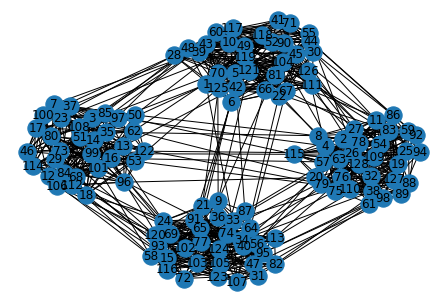

In [ ]:
nx.draw(G_lfr,with_labels=True)

In [ ]:
B_lfr.shape

(128, 128)

In [ ]:
B_lfr=np.asarray(B_lfr,dtype=np.float64)
inputs=torch.from_numpy(B_lfr)
targets=torch.from_numpy(B_lfr)
print(inputs.shape)

torch.Size([128, 128])


In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
train_ds = TensorDataset(inputs, targets)

In [ ]:
len(train_ds)

128

In [ ]:
def givetrain(inputs,targets):  
  train_ds = TensorDataset(inputs, targets)
  train_dl=DataLoader(train_ds,batch_size=len(train_ds))
  return train_dl

In [ ]:
for xb, yb in givetrain(inputs,targets):
    print(xb)
    print(yb)
    break

tensor([[-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250,  0.8750],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        ...,
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250,  0.8750, -0.1250,  ..., -0.1250, -0.1250, -0.1250]],
       dtype=torch.float64)
tensor([[-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250,  0.8750],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        ...,
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250,  0.8750, -0.1250,  ..., -0.1250, -0.1250, -0.1250]],
       dtype=torch.float64)


In [ ]:
class AE(nn.Module):
    def __init__(self,in_layers,hidden_layers):
        super().__init__()
        # Encoder
        self.encoder_hidden_layer = nn.Linear(
            in_features=in_layers, out_features=hidden_layers
        )
        self.encoder_output_layer = nn.Linear(
            in_features=hidden_layers, out_features=hidden_layers
        )
        # DEcoder
        self.decoder_hidden_layer= nn.Linear(
            in_features=hidden_layers, out_features=hidden_layers
        )
        self.decoder_output_layer = nn.Linear(
            in_features=hidden_layers, out_features=in_layers
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.tanh(activation)
        # activation = nn.Dropout(p=0.01)(activation)
        code = self.encoder_output_layer(activation)
        code = torch.tanh(code)
        # code = nn.Dropout(p=0.01)(code)
        encoder=code
        activation = self.decoder_hidden_layer(code)
        activation = torch.tanh(activation)
        # activation = nn.Dropout(p=0.01)(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.tanh(activation)
        return encoder,reconstructed

In [ ]:
epochs = 1000
learning_rate = 1e-4

In [ ]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model1 = AE(hidden_layers=64,in_layers=128).to(device)
model2=AE(hidden_layers=32,in_layers=64).to(device)
model3=AE(hidden_layers=16,in_layers=32).to(device)
# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)

# mean-squared error loss
def loss_func(input,target):
  return F.mse_loss(input,target)
print(model2)

AE(
  (encoder_hidden_layer): Linear(in_features=64, out_features=32, bias=True)
  (encoder_output_layer): Linear(in_features=32, out_features=32, bias=True)
  (decoder_hidden_layer): Linear(in_features=32, out_features=32, bias=True)
  (decoder_output_layer): Linear(in_features=32, out_features=64, bias=True)
)


In [ ]:
def train_model(epochs,train_dl,model,optimizer):
  enc,out=0,0
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_dl:
      # reshape mini-batch data to [N, 784] matrix
      # load it to the active device
      # batch_features = batch_features.view(-1, 784).to(device)
      
      # reset the gradients back to zero
      # PyTorch accumulates gradients on subsequent backward passes
        # optimizer.zero_grad()
        optimizer.zero_grad()
        # compute reconstructions
        encoder,outputs = model(batch_features.float())
        # out=outputs
        outputs=outputs.double()
        # compute training reconstruction loss
        train_loss = loss_func(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        enc=encoder
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
        # enc=encoder  
    # compute the epoch training loss
    loss = loss / len(train_dl)
    
    # display the epoch training loss
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))
  return(enc)

In [ ]:
def train_model_new(epochs,train_dl,model,optimizer):
  enc,out=0,0
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_dl:
      # reshape mini-batch data to [N, 784] matrix
      # load it to the active device
      # batch_features = batch_features.view(-1, 784).to(device)
      
      # reset the gradients back to zero
      # PyTorch accumulates gradients on subsequent backward passes
        # optimizer.zero_grad()
        optimizer.zero_grad()
        # compute reconstructions
        encoder,outputs = model(batch_features)
        # out=outputs
        outputs=outputs
        # compute training reconstruction loss
        train_loss = loss_func(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        enc=encoder
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
        # enc=encoder  
    # compute the epoch training loss
    loss = loss / len(train_dl)
    
    # display the epoch training loss
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))
  return(enc)

In [ ]:
train_dl=givetrain(inputs,targets)

encoder=train_model(4000,train_dl,model1,optimizer1)
train_dl=givetrain(encoder.detach(),encoder.detach())
print(encoder.detach().shape)

encoder=train_model_new(5000,train_dl,model2,optimizer2)
train_dl=givetrain(encoder.detach(),encoder.detach())
print(encoder.detach().shape)

encoder=train_model_new(5000,train_dl,model3,optimizer3)
train_dl=givetrain(encoder.detach(),encoder.detach())
print(encoder.detach().shape)

Streaming output truncated to the last 5000 lines.
epoch : 3/5000, recon loss = 0.25007930
epoch : 4/5000, recon loss = 0.24988729
epoch : 5/5000, recon loss = 0.24969597
epoch : 6/5000, recon loss = 0.24950545
epoch : 7/5000, recon loss = 0.24931560
epoch : 8/5000, recon loss = 0.24912651
epoch : 9/5000, recon loss = 0.24893814
epoch : 10/5000, recon loss = 0.24875054
epoch : 11/5000, recon loss = 0.24856368
epoch : 12/5000, recon loss = 0.24837756
epoch : 13/5000, recon loss = 0.24819222
epoch : 14/5000, recon loss = 0.24800766
epoch : 15/5000, recon loss = 0.24782383
epoch : 16/5000, recon loss = 0.24764079
epoch : 17/5000, recon loss = 0.24745853
epoch : 18/5000, recon loss = 0.24727702
epoch : 19/5000, recon loss = 0.24709632
epoch : 20/5000, recon loss = 0.24691635
epoch : 21/5000, recon loss = 0.24673717
epoch : 22/5000, recon loss = 0.24655874
epoch : 23/5000, recon loss = 0.24638110
epoch : 24/5000, recon loss = 0.24620421
epoch : 25/5000, recon loss = 0.24602810
epoch : 26/50

In [ ]:
B_lfr_X=encoder.detach().numpy()

In [ ]:
print(type(B_lfr_X),B_lfr_X)

<class 'numpy.ndarray'> [[-0.14811775  0.5078857  -0.3529258  ... -0.7384185   0.14336503
   0.39342993]
 [-0.05810456 -0.36299136  0.34452707 ...  0.46802476 -0.524691
   0.37301457]
 [-0.03682136  0.478265    0.26680624 ... -0.48520878  0.55477965
   0.22744891]
 ...
 [-0.7690157   0.16422042 -0.5629473  ... -0.28787497  0.08302823
   0.0770462 ]
 [-0.24933226 -0.42151642  0.55263114 ... -0.01485386 -0.2823726
  -0.20864438]
 [ 0.6251725  -0.3810576   0.7655037  ...  0.0511782   0.23566197
  -0.5124544 ]]


In [ ]:
kmeans = KMeans(init='k-means++',n_clusters=4,random_state=7111)
kmeans.fit(B_lfr_X)
X_ae = kmeans.labels_

c_groups=[]
c_attributes = nx.get_node_attributes(G_lfr,'value')
for i, val in enumerate(c_attributes.values()):
    c_groups.append(val)
        
X_gt = np.array(c_groups)
print(X_ae)
print(X_gt)
metrics.normalized_mutual_info_score(X_gt, X_ae, average_method='arithmetic')

[0 3 2 3 0 0 2 3 1 0 3 2 2 2 1 2 2 2 3 3 1 0 2 1 3 3 3 0 2 0 1 3 1 1 2 1 2
 3 0 1 0 0 2 0 0 2 1 0 0 2 3 0 2 3 0 1 3 1 3 0 3 2 3 1 1 0 0 2 1 0 0 1 2 1
 3 2 1 3 3 2 0 1 3 2 2 3 1 3 3 0 1 3 1 3 1 2 2 3 2 2 1 1 1 0 1 2 1 2 3 3 0
 2 1 2 3 1 0 0 0 1 0 2 1 1 0 0 3 3]
[2 4 1 4 2 2 1 4 3 2 4 1 1 1 3 1 1 1 4 4 3 2 1 3 4 4 4 2 1 2 3 4 3 3 1 3 1
 4 2 3 2 2 2 2 2 1 3 2 2 1 1 2 1 4 2 3 4 3 4 2 4 1 4 3 3 2 2 1 3 2 2 3 1 3
 4 4 3 4 4 1 2 3 4 1 1 4 3 4 4 2 3 4 3 4 3 1 1 4 1 1 1 3 3 2 3 1 3 1 4 4 2
 1 3 1 4 3 2 2 2 3 2 1 3 3 2 2 4 4]


0.8997737642700336

In [ ]:
max=0
index_max=0
for value in range(1,10000):
    kmeans = KMeans(init='k-means++',n_clusters=4,random_state=value)
    kmeans.fit(B_lfr_X)
    X_ae = kmeans.labels_

    c_groups=[]
    c_attributes = nx.get_node_attributes(G_lfr,'value')
    for i, val in enumerate(c_attributes.values()):
        c_groups.append(val)
            
    X_gt = np.array(c_groups)
    temp=metrics.normalized_mutual_info_score(X_gt, X_ae, average_method='arithmetic')
    if(temp>max):
        max=temp
        index_max=value
    print("Epoch:{}".format(value),index_max,max)

Streaming output truncated to the last 5000 lines.
Epoch:5001 3997 0.8676601487166408
Epoch:5002 3997 0.8676601487166408
Epoch:5003 3997 0.8676601487166408
Epoch:5004 3997 0.8676601487166408
Epoch:5005 3997 0.8676601487166408
Epoch:5006 3997 0.8676601487166408
Epoch:5007 3997 0.8676601487166408
Epoch:5008 3997 0.8676601487166408
Epoch:5009 3997 0.8676601487166408
Epoch:5010 3997 0.8676601487166408
Epoch:5011 3997 0.8676601487166408
Epoch:5012 3997 0.8676601487166408
Epoch:5013 3997 0.8676601487166408
Epoch:5014 3997 0.8676601487166408
Epoch:5015 3997 0.8676601487166408
Epoch:5016 3997 0.8676601487166408
Epoch:5017 3997 0.8676601487166408
Epoch:5018 3997 0.8676601487166408
Epoch:5019 3997 0.8676601487166408
Epoch:5020 3997 0.8676601487166408
Epoch:5021 3997 0.8676601487166408
Epoch:5022 3997 0.8676601487166408
Epoch:5023 3997 0.8676601487166408
Epoch:5024 3997 0.8676601487166408
Epoch:5025 3997 0.8676601487166408
Epoch:5026 3997 0.8676601487166408
Epoch:5027 3997 0.8676601487166408
Epoc